In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense

c:\users\piotrwiercinski\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Validation concept
<br>
Due to the fact that LDA modelling is an unsupervised method its validity is inherently difficult to assess in an interpretable and scientificly rigourous manner. <br><br>
It can be assumed that a high quality LDA model would provide an informative representation of the topic distribution in the text. It can also be assumed that there exists a connection between the Times news desks that produce articles and the topic distributions of the articles. <br><br>
Consequently, the validity of LDA topic assignment could be tested by predicting the article's news desk basing on its LDA topic representation. The hypothesis is that if the LDA topic and news desk data are informative in the context of article's topic distribution, then the performance of a supervised learning model should be significantly better than random.

In [2]:
df = pd.read_csv(r'C:\Users\PiotrWiercinski\Documents\Research\Github&kaggle\Times articles data\lda_data\lda_topics_df.csv',
                index_col='index')

In [3]:
df.head()

,articleID,keywords_x,text,corpus,lda_topics,abstract,articleWordCount,byline,documentType,headline,keywords_y,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
index,,,,,,,,,,,,,,,,,,,,
0,5adf6684068401528a2aa69b,"['offer', 'statement', 'cheerleading', 'suppor...",The N.F.L. has responded with a written statem...,"[(0, 1), (1, 1), (2, 3), (3, 5), (4, 2), (5, 3...","[(17, 0.08008672), (21, 0.022569574), (26, 0.1...",NaN,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,"['likely', 'epa', 'studies', 'effect', 'policy...",WASHINGTON — The Environmental Protection Agen...,"[(79, 1), (80, 1), (81, 1), (82, 5), (83, 1), ...","[(7, 0.0800965), (16, 0.44378182), (41, 0.0247...",NaN,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,"['probably', 'frequently', 'mr', 'asked', 'din...","If I get a reservation, will eating at Noma ma...","[(7, 1), (60, 1), (97, 2), (119, 1), (120, 1),...","[(0, 0.018988285), (2, 0.121632785), (9, 0.018...",NaN,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,"['iran', 'nuclear', 'constrain', 'mr', 'korea'...",WASHINGTON — President Trump signaled on Tuesd...,"[(42, 1), (50, 1), (97, 4), (99, 2), (116, 1),...","[(0, 0.020230627), (7, 0.06410627), (11, 0.438...",NaN,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,"['counts', 'women', 'murder', 'tuesdaythe', 'e...",TORONTO — The man identified as the van driver...,"[(38, 1), (76, 1), (97, 1), (113, 1), (116, 1)...","[(7, 0.086451806), (10, 0.021542551), (16, 0.0...",NaN,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


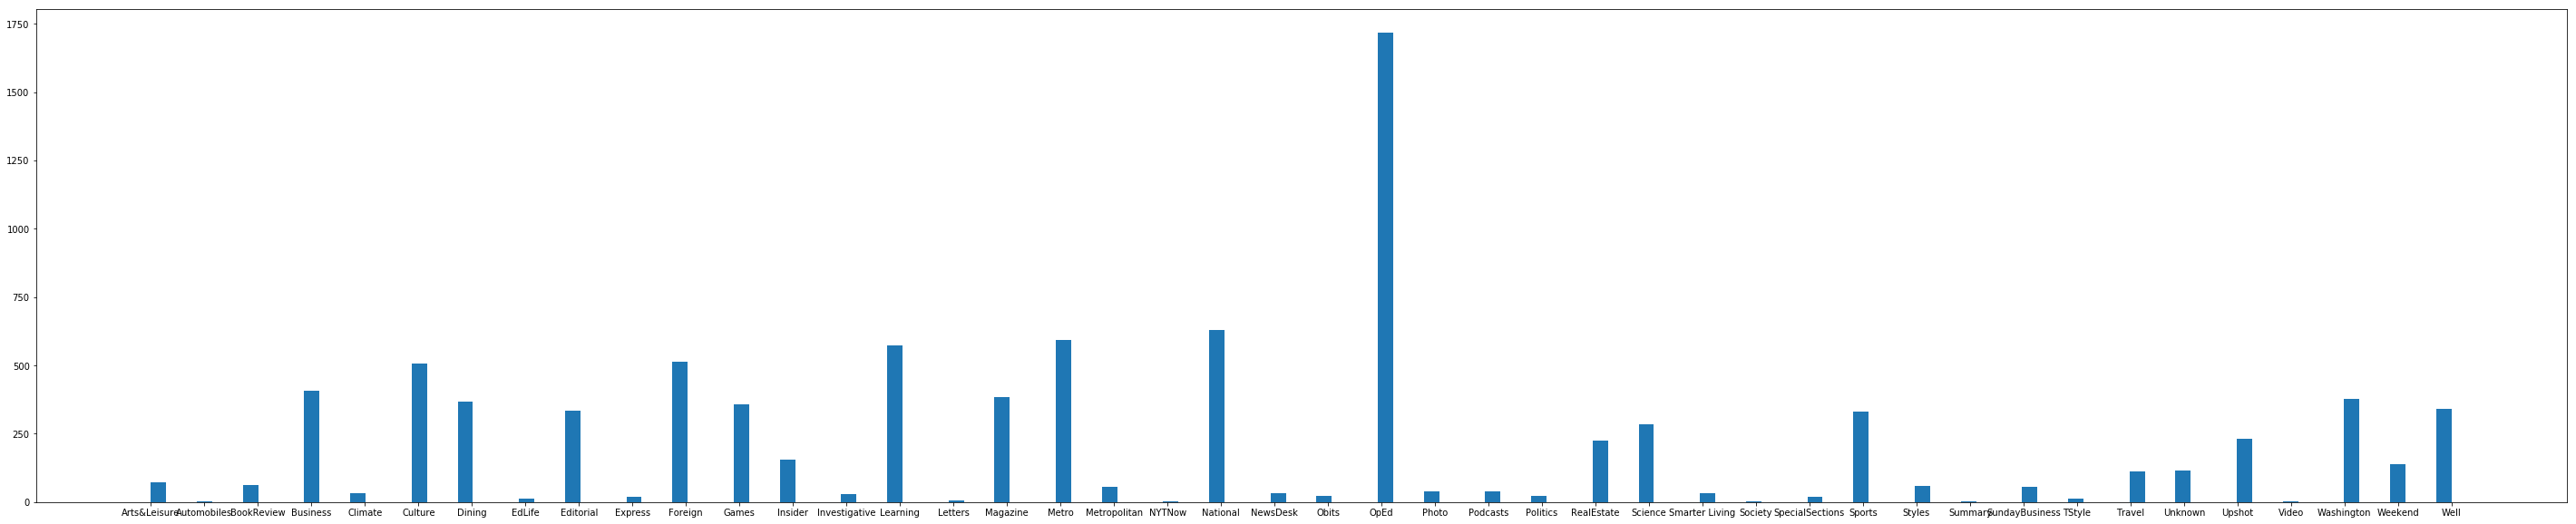

In [4]:
plt.rcParams['figure.figsize'] = (50, 10)
plt.hist(df.newDesk, bins=150)
plt.show()

In [5]:
def get_topic_vector(lda_topic_output, n_topics):
    vector = np.zeros(shape=(1, n_topics))
    for topic in lda_topic_output:
        vector[0, topic[0]] = topic[1]
    return vector

In [6]:
df['topic_vector'] = df.lda_topics.apply(lambda x: get_topic_vector(literal_eval(x), 80))

Due to the low amount of data, a subset of the data is chosen to facilitate the performance of the learning algorithm.

In [7]:
data = df[df.newDesk.isin(['Business', 'Culture', 'Foreign', 'Learning'])]

In [8]:
data = pd.get_dummies(data.newDesk)

In [9]:
data = df.loc[:, ['index', 'topic_vector']].merge(data, left_index=True, right_index=True).drop('index', axis=1)

c:\users\piotrwiercinski\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
c:\users\piotrwiercinski\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [10]:
data.head()

,topic_vector,Business,Culture,Foreign,Learning
index,,,,,
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0864518...",0,0,1,0
9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5019718, 0.0...",0,0,0,1
13,"[[0.0, 0.0, 0.011637932, 0.0, 0.0, 0.011737227...",1,0,0,0
23,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.79271823, 0....",0,0,0,1
24,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,0,0,1


In [11]:
train_data = data.topic_vector.values

In [12]:
reshaped_train_data = np.zeros(shape=(1, 80))
for each in train_data:
    reshaped_train_data = np.vstack((reshaped_train_data, each))
reshaped_train_data = np.delete(reshaped_train_data, 0, 0)

In [13]:
train_data = reshaped_train_data

In [14]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)

In [15]:
target = data.drop('topic_vector', axis=1)

In [16]:
x_train, x_dev, y_train, y_dev = train_test_split(train_data, target.values, test_size=0.3, random_state=2)

In [17]:
model = Sequential()
model.add(Dense(4, input_dim=x_train.shape[1], activation='softmax', kernel_initializer='glorot_normal',
                bias_initializer='zeros'))
    

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1401/1401 [==============================] - 0s - loss: 1.8324 - categorical_accuracy: 0.2384     
Epoch 2/50
1401/1401 [==============================] - 0s - loss: 1.5739 - categorical_accuracy: 0.3276     
Epoch 3/50
1401/1401 [==============================] - 0s - loss: 1.3621 - categorical_accuracy: 0.4154     
Epoch 4/50
1401/1401 [==============================] - 0s - loss: 1.1923 - categorical_accuracy: 0.5211     
Epoch 5/50
1401/1401 [==============================] - 0s - loss: 1.0579 - categorical_accuracy: 0.5853     
Epoch 6/50
1401/1401 [==============================] - 0s - loss: 0.9517 - categorical_accuracy: 0.6331     
Epoch 7/50
1401/1401 [==============================] - 0s - loss: 0.8680 - categorical_accuracy: 0.6724     
Epoch 8/50
1401/1401 [==============================] - 0s - loss: 0.8026 - categorical_accuracy: 0.7052     
Epoch 9/50
1401/1401 [==============================] - 0s - loss: 0.7493 - categorical_accuracy: 0.7345     
Epoch 10/5

In [20]:
print("\n \n" + "Categorical accuracy on the test set " + str(np.round(model.evaluate(x_dev, y_dev)[1], 5)))

 32/601 [>.............................] - ETA: 0s
 
Categorical accuracy on the test set 0.81032


In [21]:
np.sum(y_dev, axis=0)/len(y_dev) 

array([0.21131448, 0.25457571, 0.24292845, 0.29118136])

#### Class distribution

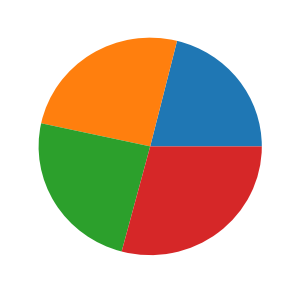

In [22]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(np.sum(y_dev, axis=0))
plt.show()

This simple model has been able to predict the news desk an article came from with over 80% accuracy basing purely on the LDA generated topic distribution.<br>
If the algorithm acted randomly the accuracy of about 25% would be expected.

Hence it can be concluded that this LDA model provides an informative representation of the topic distribution of articles.